In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas_bokeh

In [2]:
#h =  !hostname
h = 'test'

if h[0] == 'cio-Aspire-VN7-593G':
    folder = '../covid19-opendata-vaccini/'
    df_anagrafica = pd.read_csv(folder +'dati/anagrafica-vaccini-summary-latest.csv')  # si aggiorna
    #df_consegne = pd.read_csv(folder +'dati/consegne-vaccini-latest.csv') # si aggiorna
    df_platea = pd.read_csv(folder +'dati/platea.csv')
    df_platea_booster = pd.read_csv(folder +'dati/platea-dose-addizionale-booster.csv')
    #df_punti_som_latest = pd.read_csv(folder +'dati/punti-somministrazione-latest.csv')
    #df_punti_som_tipologia = pd.read_csv(folder +'dati/punti-somministrazione-tipologia.csv')
    #df_guariti = pd.read_csv(folder +'dati/soggetti-guariti.csv')  # si aggiorna
    df_somministrazione = pd.read_csv(folder +'dati/somministrazioni-vaccini-latest.csv', parse_dates = ['data_somministrazione'])  # si aggiorna
    df_somministrazione_summary = pd.read_csv(folder +'dati/somministrazioni-vaccini-summary-latest.csv', parse_dates = ['data_somministrazione'])  # si aggiorna
    #df_vaccini = pd.read_csv(folder +'dati/vaccini-summary-latest.csv')   # si aggiorna
    print("Fine caricamento dataframe da dataset locali")
else:
    print("Inizio download dataset da github\n...")    
    url="https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/anagrafica-vaccini-summary-latest.csv"
    df_anagrafica = pd.read_csv(url) #, parse_dates = ['ultimo_aggiornamento']
    url="https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv"
    df_platea = pd.read_csv(url)
    url="https://github.com/italia/covid19-opendata-vaccini/raw/master/dati/platea-dose-addizionale-booster.csv"
    df_platea_booster = pd.read_csv(url)
    url="https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv"
    df_somministrazione = pd.read_csv(url, parse_dates = ['data_somministrazione'])
    url="https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-summary-latest.csv"
    df_somministrazione_summary = pd.read_csv(url, parse_dates = ['data_somministrazione'])
    print("Fine download")
    

Inizio download dataset da github
...
Fine download


In [3]:
!ls

analisi_esplorativa_COVID.ipynb		 analisi_esplorativa_vaccini.ipynb
analisi_esplorativa_vaccini-Copy1.ipynb  analisi_platea_vs_popolazione.ipynb


# Elenco dataset

## Anagrafica df_anagrafica

In [4]:
df_anagrafica

,fascia_anagrafica,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,ultimo_aggiornamento
0,05-11,669308,345351,323957,611134,57227,947,0,2022-01-10
1,12-19,7405691,3804038,3601653,3673727,3305728,120319,305917,2022-01-10
2,20-29,11903708,6155413,5748295,5294704,4923925,210855,1474224,2022-01-10
3,30-39,12975224,6592960,6382264,5692455,5287058,211687,1784024,2022-01-10
4,40-49,17369659,8575859,8793800,7250579,6784168,288122,3046790,2022-01-10
5,50-59,20890616,10231038,10659578,8262898,7642732,340869,4644117,2022-01-10
6,60-69,17441160,8484005,8957155,6685342,6103386,232491,4419941,2022-01-10
7,70-79,14926515,7044751,7881764,5478230,5232511,158638,4057136,2022-01-10
8,80-89,9846809,4091752,5755057,3486984,3417147,76664,2866014,2022-01-10
9,90+,2178085,647493,1530592,805366,776152,19852,576715,2022-01-10


In [5]:
df_anagrafica.shape

(10, 9)

## Platea df_platea

In [6]:
df_platea

,area,nome_area,fascia_anagrafica,totale_popolazione
0,ABR,Abruzzo,05-11,76431
1,ABR,Abruzzo,12-19,94727
2,ABR,Abruzzo,20-29,125230
3,ABR,Abruzzo,30-39,146965
4,ABR,Abruzzo,40-49,187162
...,...,...,...,...
184,VEN,Veneto,40-49,715790
185,VEN,Veneto,50-59,806474
186,VEN,Veneto,60-69,610635
187,VEN,Veneto,70-79,494721


## Platea booster df_platea_booster

In [7]:
df_platea_booster

,area,nome_area,categoria_prevalente,totale_popolazione
0,ABR,Abruzzo,12-19,17099
1,ABR,Abruzzo,20-29,48958
2,ABR,Abruzzo,30-39,56429
3,ABR,Abruzzo,40-49,95005
4,ABR,Abruzzo,50-59,127410
...,...,...,...,...
163,VEN,Veneto,40-49,379810
164,VEN,Veneto,50-59,542674
165,VEN,Veneto,60-69,475409
166,VEN,Veneto,70-79,428943


## Somministrazione df_somministrazione

In [8]:
df_somministrazione

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2020-12-27,Moderna,SIC,90+,0,1,1,0,0,0,ITG,ITG1,19,Sicilia
1,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,ITF,ITF1,13,Abruzzo
2,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172223,2022-01-09,Pfizer/BioNTech,VEN,50-59,1053,1020,251,117,6,1699,ITH,ITH3,5,Veneto
172224,2022-01-09,Pfizer/BioNTech,VEN,60-69,554,544,136,46,1,915,ITH,ITH3,5,Veneto
172225,2022-01-09,Pfizer/BioNTech,VEN,70-79,223,297,59,20,0,441,ITH,ITH3,5,Veneto
172226,2022-01-09,Pfizer/BioNTech,VEN,80-89,95,155,29,13,0,208,ITH,ITH3,5,Veneto


In [9]:
np.sort(df_somministrazione['data_somministrazione'].unique())

array(['2020-12-27T00:00:00.000000000', '2020-12-28T00:00:00.000000000',
       '2020-12-29T00:00:00.000000000', '2020-12-30T00:00:00.000000000',
       '2020-12-31T00:00:00.000000000', '2021-01-01T00:00:00.000000000',
       '2021-01-02T00:00:00.000000000', '2021-01-03T00:00:00.000000000',
       '2021-01-04T00:00:00.000000000', '2021-01-05T00:00:00.000000000',
       '2021-01-06T00:00:00.000000000', '2021-01-07T00:00:00.000000000',
       '2021-01-08T00:00:00.000000000', '2021-01-09T00:00:00.000000000',
       '2021-01-10T00:00:00.000000000', '2021-01-11T00:00:00.000000000',
       '2021-01-12T00:00:00.000000000', '2021-01-13T00:00:00.000000000',
       '2021-01-14T00:00:00.000000000', '2021-01-15T00:00:00.000000000',
       '2021-01-16T00:00:00.000000000', '2021-01-17T00:00:00.000000000',
       '2021-01-18T00:00:00.000000000', '2021-01-19T00:00:00.000000000',
       '2021-01-20T00:00:00.000000000', '2021-01-21T00:00:00.000000000',
       '2021-01-22T00:00:00.000000000', '2021-01-23

In [10]:
df_somministrazione.dtypes

data_somministrazione       datetime64[ns]
fornitore                           object
area                                object
fascia_anagrafica                   object
sesso_maschile                       int64
sesso_femminile                      int64
prima_dose                           int64
seconda_dose                         int64
pregressa_infezione                  int64
dose_addizionale_booster             int64
codice_NUTS1                        object
codice_NUTS2                        object
codice_regione_ISTAT                 int64
nome_area                           object
dtype: object

In [11]:
df_somministrazione['data_somministrazione'].describe(datetime_is_numeric=True)

count                           172228
mean     2021-07-12 09:19:05.040295424
min                2020-12-27 00:00:00
25%                2021-04-30 00:00:00
50%                2021-07-10 00:00:00
75%                2021-09-25 00:00:00
max                2022-01-09 00:00:00
Name: data_somministrazione, dtype: object

In [12]:
np.sort(df_somministrazione_summary['data_somministrazione'].unique())

array(['2020-12-27T00:00:00.000000000', '2020-12-28T00:00:00.000000000',
       '2020-12-29T00:00:00.000000000', '2020-12-30T00:00:00.000000000',
       '2020-12-31T00:00:00.000000000', '2021-01-01T00:00:00.000000000',
       '2021-01-02T00:00:00.000000000', '2021-01-03T00:00:00.000000000',
       '2021-01-04T00:00:00.000000000', '2021-01-05T00:00:00.000000000',
       '2021-01-06T00:00:00.000000000', '2021-01-07T00:00:00.000000000',
       '2021-01-08T00:00:00.000000000', '2021-01-09T00:00:00.000000000',
       '2021-01-10T00:00:00.000000000', '2021-01-11T00:00:00.000000000',
       '2021-01-12T00:00:00.000000000', '2021-01-13T00:00:00.000000000',
       '2021-01-14T00:00:00.000000000', '2021-01-15T00:00:00.000000000',
       '2021-01-16T00:00:00.000000000', '2021-01-17T00:00:00.000000000',
       '2021-01-18T00:00:00.000000000', '2021-01-19T00:00:00.000000000',
       '2021-01-20T00:00:00.000000000', '2021-01-21T00:00:00.000000000',
       '2021-01-22T00:00:00.000000000', '2021-01-23

In [13]:
df_subset_somministrazione = df_somministrazione[df_somministrazione['data_somministrazione'] == '2021-12-15']
df_subset_somministrazione.shape


(400, 14)

In [14]:
df_subset_somministrazione

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
162034,2021-12-15,Janssen,EMR,30-39,0,1,1,0,0,0,ITH,ITH5,8,Emilia-Romagna
162035,2021-12-15,Janssen,EMR,40-49,1,1,2,0,0,0,ITH,ITH5,8,Emilia-Romagna
162036,2021-12-15,Janssen,EMR,50-59,0,1,1,0,0,0,ITH,ITH5,8,Emilia-Romagna
162037,2021-12-15,Janssen,EMR,70-79,0,1,1,0,0,0,ITH,ITH5,8,Emilia-Romagna
162038,2021-12-15,Janssen,FVG,60-69,1,0,1,0,0,0,ITH,ITH4,6,Friuli-Venezia Giulia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162429,2021-12-15,Pfizer/BioNTech,VEN,50-59,2137,2449,203,159,2,4222,ITH,ITH3,5,Veneto
162430,2021-12-15,Pfizer/BioNTech,VEN,60-69,2008,2387,103,103,2,4187,ITH,ITH3,5,Veneto
162431,2021-12-15,Pfizer/BioNTech,VEN,70-79,2444,2859,81,72,0,5150,ITH,ITH3,5,Veneto
162432,2021-12-15,Pfizer/BioNTech,VEN,80-89,964,1646,32,45,0,2533,ITH,ITH3,5,Veneto


In [15]:
df_somministrazione['fornitore'].unique()

array(['Moderna', 'Pfizer/BioNTech', 'Janssen', 'Vaxzevria (AstraZeneca)',
       'Pfizer Pediatrico'], dtype=object)

## Somministrazione sumary df_somministrazione_summary

In [16]:
df_somministrazione_summary

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2021-02-12,PAB,731,217,514,465,248,18,0,ITH,ITH1,4,Provincia Autonoma Bolzano / Bozen
1,2021-03-23,PIE,12978,5482,7496,6363,6256,359,0,ITC,ITC1,1,Piemonte
2,2021-07-14,MOL,3447,1686,1761,211,3218,18,0,ITF,ITF2,14,Molise
3,2021-09-15,CAM,15313,7572,7741,6068,8546,696,3,ITF,ITF3,15,Campania
4,2021-12-21,SIC,32810,15746,17064,3372,2485,60,26893,ITG,ITG1,19,Sicilia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7857,2021-06-15,CAM,18700,9105,9595,10945,7438,317,0,ITF,ITF3,15,Campania
7858,2021-07-25,UMB,7318,3852,3466,1164,6106,48,0,ITI,ITI2,10,Umbria
7859,2021-12-29,UMB,9724,4660,5064,826,488,26,8384,ITI,ITI2,10,Umbria
7860,2021-02-21,SIC,5170,2502,2668,5037,107,26,0,ITG,ITG1,19,Sicilia


In [17]:
df_somministrazione['data_somministrazione'].describe(datetime_is_numeric=True)

count                           172228
mean     2021-07-12 09:19:05.040295424
min                2020-12-27 00:00:00
25%                2021-04-30 00:00:00
50%                2021-07-10 00:00:00
75%                2021-09-25 00:00:00
max                2022-01-09 00:00:00
Name: data_somministrazione, dtype: object

In [18]:
np.sort(df_somministrazione_summary['data_somministrazione'].unique())

array(['2020-12-27T00:00:00.000000000', '2020-12-28T00:00:00.000000000',
       '2020-12-29T00:00:00.000000000', '2020-12-30T00:00:00.000000000',
       '2020-12-31T00:00:00.000000000', '2021-01-01T00:00:00.000000000',
       '2021-01-02T00:00:00.000000000', '2021-01-03T00:00:00.000000000',
       '2021-01-04T00:00:00.000000000', '2021-01-05T00:00:00.000000000',
       '2021-01-06T00:00:00.000000000', '2021-01-07T00:00:00.000000000',
       '2021-01-08T00:00:00.000000000', '2021-01-09T00:00:00.000000000',
       '2021-01-10T00:00:00.000000000', '2021-01-11T00:00:00.000000000',
       '2021-01-12T00:00:00.000000000', '2021-01-13T00:00:00.000000000',
       '2021-01-14T00:00:00.000000000', '2021-01-15T00:00:00.000000000',
       '2021-01-16T00:00:00.000000000', '2021-01-17T00:00:00.000000000',
       '2021-01-18T00:00:00.000000000', '2021-01-19T00:00:00.000000000',
       '2021-01-20T00:00:00.000000000', '2021-01-21T00:00:00.000000000',
       '2021-01-22T00:00:00.000000000', '2021-01-23

In [19]:
df_subset = df_somministrazione_summary[df_somministrazione_summary['data_somministrazione'] == '2021-12-15']
df_subset.shape

(21, 13)

In [21]:
#verifico la presenza di tutte le regioni:
df_subset.sort_values('codice_regione_ISTAT')

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
5446,2021-12-15,PIE,33747,15632,18115,2095,1518,28,30106,ITC,ITC1,1,Piemonte
7312,2021-12-15,VDA,1485,716,769,61,15,0,1409,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
4693,2021-12-15,LOM,102317,47876,54441,3480,2012,100,96725,ITC,ITC4,3,Lombardia
370,2021-12-15,PAB,2628,1281,1347,220,285,1,2122,ITH,ITH1,4,Provincia Autonoma Bolzano / Bozen
6162,2021-12-15,PAT,3311,1438,1873,236,204,3,2868,ITH,ITH2,4,Provincia Autonoma Trento
6045,2021-12-15,VEN,55348,25786,29562,2698,1825,88,50737,ITH,ITH3,5,Veneto
5017,2021-12-15,FVG,11567,5600,5967,425,649,2,10491,ITH,ITH4,6,Friuli-Venezia Giulia
5146,2021-12-15,LIG,16291,7444,8847,1047,943,4,14297,ITC,ITC3,7,Liguria
3703,2021-12-15,EMR,39679,18053,21626,1714,889,62,37014,ITH,ITH5,8,Emilia-Romagna
5523,2021-12-15,TOS,37565,17139,20426,2157,1586,88,33734,ITI,ITI1,9,Toscana


In [22]:
np.sort(df_somministrazione_summary['codice_regione_ISTAT'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

### Colonne differenti tra df_somministrazione e df_somministrazione_summary

In [23]:
set_somm = set(df_somministrazione.columns)

In [24]:
set_somm_summary = set(df_somministrazione_summary.columns)

In [25]:
#differenza simmetrica
set_somm ^ set_somm_summary

{'fascia_anagrafica', 'fornitore', 'totale'}

In [26]:
#Colonne presenti solo in df_somministrazione
set_somm - set_somm_summary

{'fascia_anagrafica', 'fornitore'}

In [27]:
#Colonne presenti solo in df_somministrazione_summary
set_somm_summary - set_somm

{'totale'}

# Analisi

### Da cancellare alla fine

In [28]:
df_somministrazione_summary.head()

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2021-02-12,PAB,731,217,514,465,248,18,0,ITH,ITH1,4,Provincia Autonoma Bolzano / Bozen
1,2021-03-23,PIE,12978,5482,7496,6363,6256,359,0,ITC,ITC1,1,Piemonte
2,2021-07-14,MOL,3447,1686,1761,211,3218,18,0,ITF,ITF2,14,Molise
3,2021-09-15,CAM,15313,7572,7741,6068,8546,696,3,ITF,ITF3,15,Campania
4,2021-12-21,SIC,32810,15746,17064,3372,2485,60,26893,ITG,ITG1,19,Sicilia


In [29]:
df_somministrazione_summary[df_somministrazione_summary['data_somministrazione'] == '2021-09-01'].groupby('data_somministrazione').sum()

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_regione_ISTAT
data_somministrazione,,,,,,,,
2021-09-01,314275,164335,149940,124229,178704,11342,0,214


In [30]:
df_plot = df_somministrazione_summary[df_somministrazione_summary['data_somministrazione'] > '2021-12-01'].groupby('data_somministrazione').sum()

In [31]:
df_plot

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_regione_ISTAT
data_somministrazione,,,,,,,,
2021-12-02,493635,228573,265062,32952,21208,863,438612,214
2021-12-03,523157,238399,284758,34479,22405,842,465431,214
2021-12-04,470036,213055,256981,32106,19715,724,417491,214
2021-12-05,293954,137861,156093,22899,10050,511,260494,214
2021-12-06,522986,248923,274063,44090,22225,929,455742,214
2021-12-07,542257,252948,289309,42618,20615,733,478291,214
2021-12-08,281038,135123,145915,23502,7981,466,249089,214
2021-12-09,556977,261899,295078,38159,27838,788,490192,214
2021-12-10,576343,264845,311498,35939,24478,774,515152,214


## Tipi di plot

### Seaborn

In [32]:
sns.set_style("darkgrid")

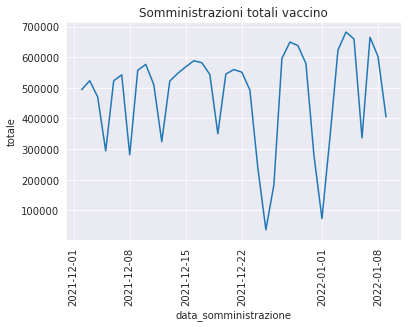

In [33]:
sns.lineplot(x="data_somministrazione", y="totale",\
             data=df_plot)
plt.xticks(rotation=90)
plt.title('Somministrazioni totali vaccino')
plt.show()

### Plot pandas

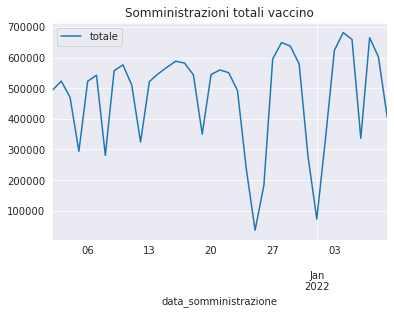

In [34]:
df_plot.plot(y="totale", title = 'Somministrazioni totali vaccino')
plt.show()

### Pandas bokeh

In [35]:
pandas_bokeh.output_notebook()

g = df_plot.plot_bokeh(y="totale", kind='line', vertical_xlabel = True)
#g.xaxis.major_label_orientation = 78



Loading BokehJS ...

In [36]:
df_somministrazione_summary

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2021-02-12,PAB,731,217,514,465,248,18,0,ITH,ITH1,4,Provincia Autonoma Bolzano / Bozen
1,2021-03-23,PIE,12978,5482,7496,6363,6256,359,0,ITC,ITC1,1,Piemonte
2,2021-07-14,MOL,3447,1686,1761,211,3218,18,0,ITF,ITF2,14,Molise
3,2021-09-15,CAM,15313,7572,7741,6068,8546,696,3,ITF,ITF3,15,Campania
4,2021-12-21,SIC,32810,15746,17064,3372,2485,60,26893,ITG,ITG1,19,Sicilia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7857,2021-06-15,CAM,18700,9105,9595,10945,7438,317,0,ITF,ITF3,15,Campania
7858,2021-07-25,UMB,7318,3852,3466,1164,6106,48,0,ITI,ITI2,10,Umbria
7859,2021-12-29,UMB,9724,4660,5064,826,488,26,8384,ITI,ITI2,10,Umbria
7860,2021-02-21,SIC,5170,2502,2668,5037,107,26,0,ITG,ITG1,19,Sicilia


### FINE Da cancellare alla fine

## Andamento vaccini totale - prima, seconda, booster

In [100]:
df_somministrazione_summary.sort_values('data_somministrazione').head(5)

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
7385,2020-12-27,TOS,629,275,354,628,0,1,0,ITI,ITI1,9,Toscana
1815,2020-12-27,CAM,721,423,298,720,0,1,0,ITF,ITF3,15,Campania
3372,2020-12-27,CAL,318,170,148,318,0,0,0,ITF,ITF6,18,Calabria
536,2020-12-27,ABR,47,24,23,47,0,0,0,ITF,ITF1,13,Abruzzo
598,2020-12-27,BAS,107,41,66,107,0,0,0,ITF,ITF5,17,Basilicata


In [37]:
#Raggruppo somministrazioDF che ha informazione divisa per regioni 
df_somm_grouped = df_somministrazione_summary.groupby('data_somministrazione').sum()

In [38]:
df_somm_grouped

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_regione_ISTAT
data_somministrazione,,,,,,,,
2020-12-27,7346,3499,3847,7331,0,15,0,214
2020-12-28,1503,687,816,1501,0,2,0,85
2020-12-29,1119,491,628,1118,0,1,0,86
2020-12-30,4869,1958,2911,4867,0,2,0,105
2020-12-31,25930,10057,15873,25896,0,34,0,152
...,...,...,...,...,...,...,...,...
2022-01-05,659291,319745,339546,70140,33359,1467,554325,214
2022-01-06,336407,169713,166694,45193,19230,854,271130,214
2022-01-07,664883,326391,338492,72847,55007,1639,535390,214


In [39]:
g = df_somm_grouped.plot_bokeh(y = [\
                           'prima_dose','seconda_dose', 'dose_addizionale_booster', 'pregressa_infezione'],
                           vertical_xlabel = True, title="-----------", figsize=(950, 500),\
                               legend="top_left", stacked=True, kind='bar')#, logy=True)

In [40]:
g = df_somm_grouped.resample(rule='W').mean().plot_bokeh(y = [\
                           'prima_dose','seconda_dose', 'dose_addizionale_booster', 'pregressa_infezione'],
                           vertical_xlabel = True, title="-----------", figsize=(950, 500),\
                               legend="top_left", stacked=True, kind='bar')#, logy=True)

In [98]:
g = df_somm_grouped.plot_bokeh(y = ['prima_dose','seconda_dose', 'dose_addizionale_booster',\
                                    'pregressa_infezione', 'totale',],
                           vertical_xlabel = True, title="-----------", figsize=(950, 500),\
                               legend="top_left")#, logy=True)

In [99]:
g = df_somm_grouped.resample(rule='W').mean().plot_bokeh(y = ['prima_dose','seconda_dose',\
                                        'dose_addizionale_booster', 'pregressa_infezione', 'totale'],
                           vertical_xlabel = True, title="-----------", figsize=(950, 500),
                                                 legend="top_left")#, logy=True)

In [101]:
#Verifica significato 'totale' vaccini
df_check = df_somm_grouped.copy(deep = True)
df_check.loc[:, 'check_totale'] = df_check['prima_dose'] + df_check['seconda_dose'] + df_check['dose_addizionale_booster'] + df_check['pregressa_infezione']
df_check

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_regione_ISTAT,check_totale
data_somministrazione,,,,,,,,,
2020-12-27,7346,3499,3847,7331,0,15,0,214,7346
2020-12-28,1503,687,816,1501,0,2,0,85,1503
2020-12-29,1119,491,628,1118,0,1,0,86,1119
2020-12-30,4869,1958,2911,4867,0,2,0,105,4869
2020-12-31,25930,10057,15873,25896,0,34,0,152,25930
...,...,...,...,...,...,...,...,...,...
2022-01-05,659291,319745,339546,70140,33359,1467,554325,214,659291
2022-01-06,336407,169713,166694,45193,19230,854,271130,214,336407
2022-01-07,664883,326391,338492,72847,55007,1639,535390,214,664883


## Vaccini per fasce anagrafiche

In [50]:
df_somministrazione.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172228 entries, 0 to 172227
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   data_somministrazione     172228 non-null  datetime64[ns]
 1   fornitore                 172228 non-null  object        
 2   area                      172228 non-null  object        
 3   fascia_anagrafica         172228 non-null  object        
 4   sesso_maschile            172228 non-null  int64         
 5   sesso_femminile           172228 non-null  int64         
 6   prima_dose                172228 non-null  int64         
 7   seconda_dose              172228 non-null  int64         
 8   pregressa_infezione       172228 non-null  int64         
 9   dose_addizionale_booster  172228 non-null  int64         
 10  codice_NUTS1              172228 non-null  object        
 11  codice_NUTS2              172228 non-null  object        
 12  co

In [51]:
df_somministrazione.tail()

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
172223,2022-01-09,Pfizer/BioNTech,VEN,50-59,1053,1020,251,117,6,1699,ITH,ITH3,5,Veneto
172224,2022-01-09,Pfizer/BioNTech,VEN,60-69,554,544,136,46,1,915,ITH,ITH3,5,Veneto
172225,2022-01-09,Pfizer/BioNTech,VEN,70-79,223,297,59,20,0,441,ITH,ITH3,5,Veneto
172226,2022-01-09,Pfizer/BioNTech,VEN,80-89,95,155,29,13,0,208,ITH,ITH3,5,Veneto
172227,2022-01-09,Pfizer/BioNTech,VEN,90+,11,42,3,1,0,49,ITH,ITH3,5,Veneto


In [104]:
# Faccio pivot per ottenere andamento somministrazioni per ciascuna fascia di età
#faccio priva pivot intermedia per consentire di calcolare il totale dei vaccini
df_pivot = pd.pivot_table(df_somministrazione, index = ['data_somministrazione', 'fascia_anagrafica'], aggfunc=np.sum)
df_pivot

codice_regione_ISTAT  \
data_somministrazione fascia_anagrafica                         
2020-12-27            20-29                               214   
                      30-39                               214   
                      40-49                               214   
                      50-59                               214   
                      60-69                               214   
...                                                       ...   
2022-01-09            50-59                               416   
                      60-69                               431   
                      70-79                               420   
                      80-89                               416   
                      90+                                 384   

                                         dose_addizionale_booster  \
data_somministrazione fascia_anagrafica                             
2020-12-27            20-29                                     0   
                      30-39                                     0   
                      40-49                                     0   
                      50-59                                     0   
                      60-69                                     0   
...                                                           ...   
2022-01-09            50-59                                 68714   
                      60-69                                 43449   
                      70-79                                 25964   
                      80-89                                  7050   
                      90+                                    1126   

                                         pregressa_infezione  prima_dose  \
data_somministrazione fascia_anagrafica                                    
2020-12-27            20-29                                0         704   
                      30-39                                0        1088   
                      40-49                                2        1506   
                      50-59                                3        2204   
                      60-69                                5        1508   
...                                                      ...         ...   
2022-01-09            50-59                               89        4739   
                      60-69                               30        3060   
                      70-79                                7        1573   
                      80-89                                0         673   
                      90+                                  0         122   

                                         seconda_dose  sesso_femminile  \
data_somministrazione fascia_anagrafica                                  
2020-12-27            20-29                         0              446   
                      30-39                         0              598   
                      40-49                         0              939   
                      50-59                         0             1255   
                      60-69                         0              412   
...                                               ...              ...   
2022-01-09            50-59                      3107            37626   
                      60-69                      1682            24504   
                      70-79                       758            16181   
                      80-89                       326             4968   
                      90+                          49              888   

                                         sesso_maschile  
data_somministrazione fascia_anagrafica                  
2020-12-27            20-29                         258  
                      30-39                         490  
                      40-49                         569  
                      50-59                         952

In [116]:
df_pivot.loc[:, 'totale_vaccini'] = df_pivot['prima_dose'] + df_pivot['seconda_dose']\
                        + df_pivot['dose_addizionale_booster'] + df_pivot['pregressa_infezione']
df_pivot.loc['2022-01-09', :]

codice_regione_ISTAT  \
data_somministrazione fascia_anagrafica                         
2022-01-09            05-11                               193   
                      12-19                               402   
                      20-29                               416   
                      30-39                               416   
                      40-49                               420   
                      50-59                               416   
                      60-69                               431   
                      70-79                               420   
                      80-89                               416   
                      90+                                 384   

                                         dose_addizionale_booster  \
data_somministrazione fascia_anagrafica                             
2022-01-09            05-11                                     0   
                      12-19                                 15795   
                      20-29                                 39517   
                      30-39                                 43236   
                      40-49                                 59541   
                      50-59                                 68714   
                      60-69                                 43449   
                      70-79                                 25964   
                      80-89                                  7050   
                      90+                                    1126   

                                         pregressa_infezione  prima_dose  \
data_somministrazione fascia_anagrafica                                    
2022-01-09            05-11                               83       36599   
                      12-19                              329        6184   
                      20-29                              256        2112   
                      30-39                              161        2989   
                      40-49                              111        2942   
                      50-59                               89        4739   
                      60-69                               30        3060   
                      70-79                                7        1573   
                      80-89                                0         673   
                      90+                                  0         122   

                                         seconda_dose  sesso_femminile  \
data_somministrazione fascia_anagrafica                                  
2022-01-09            05-11                     18033            26427   
                      12-19                      5514            13239   
                      20-29                      2779            22096   
                      30-39                      3164            23967   
                      40-49                      3137            32399   
                      50-59                      3107            37626   
                      60-69                      1682            24504   
                      70-79                       758            16181   
                      80-89                       326             4968   
                      90+                          49              888   

                                         sesso_maschile  totale_vaccini  
data_somministrazione fascia_anagrafica                                  
2022-01-09            05-11                       28288           54715  
                      12-19                       14583           27822  
                      20-29                       22568           44664  
                      30-39                       25583           49550  
                      40-49                       33332           65731  
                      50-59                       39023           76649  
                      60-69          

In [115]:
df_1 = df_pivot.reset_index('fascia_anagrafica')
df_pivot_2 = df_1.pivot(columns = 'fascia_anagrafica', values = 'totale_vaccini')
df_pivot_2

fascia_anagrafica,05-11,12-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+
data_somministrazione,,,,,,,,,,
2020-12-27,NaN,NaN,704.0,1088.0,1508.0,2207.0,1513.0,130.0,118.0,78.0
2020-12-28,NaN,NaN,174.0,278.0,369.0,428.0,252.0,NaN,2.0,NaN
2020-12-29,NaN,NaN,88.0,211.0,244.0,337.0,204.0,14.0,12.0,9.0
2020-12-30,NaN,3.0,495.0,887.0,1245.0,1295.0,590.0,95.0,161.0,98.0
2020-12-31,NaN,23.0,2452.0,4372.0,5834.0,7224.0,3604.0,583.0,1043.0,795.0
...,...,...,...,...,...,...,...,...,...,...
2022-01-05,41494.0,37366.0,80305.0,79100.0,106117.0,127398.0,95129.0,68392.0,19773.0,4217.0
2022-01-06,33712.0,20219.0,42323.0,43503.0,57057.0,64829.0,41143.0,25101.0,7214.0,1306.0
2022-01-07,47342.0,41898.0,76432.0,81863.0,109285.0,128752.0,95510.0,62884.0,17493.0,3424.0


In [109]:
g = df_pivot_2.resample(rule='W').mean().plot_bokeh(vertical_xlabel = True,\
                        title="Fasce anagrafiche", figsize=(950, 500), legend="top_left")

In [110]:
g = df_pivot_2.fillna(0).resample(rule='W').mean()\
.plot_bokeh(kind = 'bar', vertical_xlabel = True, title="Fasce angrafiche",\
            figsize=(950, 500), stacked = True, legend="top_left")

In [62]:
g = df_pivot_2.fillna(0)\
.plot_bokeh(kind = 'bar', vertical_xlabel = True, title="Fasce angrafiche", figsize=(950, 500), stacked = True, legend="top_left")

## Percentuale vaccinati per fasce anagrafiche

In [64]:
df_anagrafica

,fascia_anagrafica,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,ultimo_aggiornamento
0,05-11,669308,345351,323957,611134,57227,947,0,2022-01-10
1,12-19,7405691,3804038,3601653,3673727,3305728,120319,305917,2022-01-10
2,20-29,11903708,6155413,5748295,5294704,4923925,210855,1474224,2022-01-10
3,30-39,12975224,6592960,6382264,5692455,5287058,211687,1784024,2022-01-10
4,40-49,17369659,8575859,8793800,7250579,6784168,288122,3046790,2022-01-10
5,50-59,20890616,10231038,10659578,8262898,7642732,340869,4644117,2022-01-10
6,60-69,17441160,8484005,8957155,6685342,6103386,232491,4419941,2022-01-10
7,70-79,14926515,7044751,7881764,5478230,5232511,158638,4057136,2022-01-10
8,80-89,9846809,4091752,5755057,3486984,3417147,76664,2866014,2022-01-10
9,90+,2178085,647493,1530592,805366,776152,19852,576715,2022-01-10


In [66]:
df_platea_grouped = df_platea.groupby('fascia_anagrafica').sum()
df_platea_grouped

,totale_popolazione
fascia_anagrafica,
05-11,3656069
12-19,4627514
20-29,6014643
30-39,6794108
40-49,8782667
50-59,9648935
60-69,7553311
70-79,6018697
80+,4570070


In [67]:
#In anagrafica sono presenti le fasce '80-89' e '90+', mentre in platea vi è la fascia '80+'
#sommo le 2 face in anagrafica per uniformare
df_somma_righe = df_anagrafica.copy().set_index('fascia_anagrafica')
df_anag_trans = df_somma_righe.transpose()
df_anag_trans.loc[:, '80+'] = df_anag_trans['80-89'] + df_anag_trans['90+']
#ripristtino la data correttamente: 
df_anag_trans.loc['ultimo_aggiornamento','80+'] = df_anag_trans.loc['ultimo_aggiornamento','80+']\
                                        [:len(df_anag_trans.loc['ultimo_aggiornamento','80+'])//2]
df_anag_new = df_anag_trans.drop(columns=['80-89', '90+']).transpose()
df_anag_new

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,ultimo_aggiornamento
fascia_anagrafica,,,,,,,,
05-11,669308,345351,323957,611134,57227,947,0,2022-01-10
12-19,7405691,3804038,3601653,3673727,3305728,120319,305917,2022-01-10
20-29,11903708,6155413,5748295,5294704,4923925,210855,1474224,2022-01-10
30-39,12975224,6592960,6382264,5692455,5287058,211687,1784024,2022-01-10
40-49,17369659,8575859,8793800,7250579,6784168,288122,3046790,2022-01-10
50-59,20890616,10231038,10659578,8262898,7642732,340869,4644117,2022-01-10
60-69,17441160,8484005,8957155,6685342,6103386,232491,4419941,2022-01-10
70-79,14926515,7044751,7881764,5478230,5232511,158638,4057136,2022-01-10
80+,12024894,4739245,7285649,4292350,4193299,96516,3442729,2022-01-10


In [69]:
df_fasce = pd.concat([df_anag_new, df_platea_grouped], axis = 1)
df_fasce

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,ultimo_aggiornamento,totale_popolazione
fascia_anagrafica,,,,,,,,,
05-11,669308,345351,323957,611134,57227,947,0,2022-01-10,3656069
12-19,7405691,3804038,3601653,3673727,3305728,120319,305917,2022-01-10,4627514
20-29,11903708,6155413,5748295,5294704,4923925,210855,1474224,2022-01-10,6014643
30-39,12975224,6592960,6382264,5692455,5287058,211687,1784024,2022-01-10,6794108
40-49,17369659,8575859,8793800,7250579,6784168,288122,3046790,2022-01-10,8782667
50-59,20890616,10231038,10659578,8262898,7642732,340869,4644117,2022-01-10,9648935
60-69,17441160,8484005,8957155,6685342,6103386,232491,4419941,2022-01-10,7553311
70-79,14926515,7044751,7881764,5478230,5232511,158638,4057136,2022-01-10,6018697
80+,12024894,4739245,7285649,4292350,4193299,96516,3442729,2022-01-10,4570070


# RIPRENDI DA QUI - inserisci anche platea booster

In [70]:
df_fasce.loc[:, 'percentuale_almeno_prima_dose'] = df_fasce['prima_dose'] / df_fasce['totale_popolazione']*100
df_fasce.loc[:, 'percentuale_seconda_dose'] = df_fasce['seconda_dose'] / df_fasce['totale_popolazione']*100
df_fasce.loc[:, 'percentuale_booster'] = df_fasce['dose_addizionale_booster'] / df_fasce['totale_popolazione']*100

df_fasce

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,ultimo_aggiornamento,totale_popolazione,percentuale_almeno_prima_dose,percentuale_seconda_dose,percentuale_booster
fascia_anagrafica,,,,,,,,,,,,
05-11,669308,345351,323957,611134,57227,947,0,2022-01-10,3656069,16.715604,1.56526,0.0
12-19,7405691,3804038,3601653,3673727,3305728,120319,305917,2022-01-10,4627514,79.388782,71.43637,6.610828
20-29,11903708,6155413,5748295,5294704,4923925,210855,1474224,2022-01-10,6014643,88.030229,81.865624,24.510582
30-39,12975224,6592960,6382264,5692455,5287058,211687,1784024,2022-01-10,6794108,83.785171,77.81828,26.258399
40-49,17369659,8575859,8793800,7250579,6784168,288122,3046790,2022-01-10,8782667,82.555549,77.244964,34.690943
50-59,20890616,10231038,10659578,8262898,7642732,340869,4644117,2022-01-10,9648935,85.635337,79.208037,48.130877
60-69,17441160,8484005,8957155,6685342,6103386,232491,4419941,2022-01-10,7553311,88.508761,80.804114,58.516603
70-79,14926515,7044751,7881764,5478230,5232511,158638,4057136,2022-01-10,6018697,91.020199,86.937605,67.408876
80+,12024894,4739245,7285649,4292350,4193299,96516,3442729,2022-01-10,4570070,93.923069,91.755684,75.332085


In [71]:
def add_value_labels(ax, spacing=2, n_decimals = 1):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        f = "{:."+str(n_decimals)+"f}"
        label = f.format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.




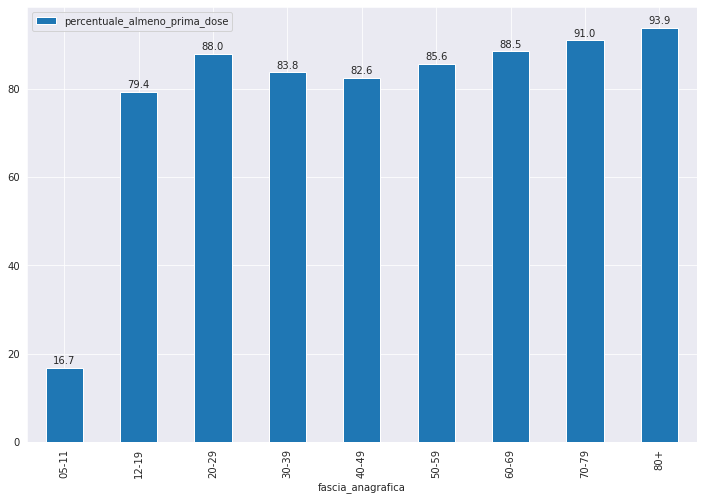

In [72]:
#df_fasce.plot(kind = 'bar', y = 'percentuale_almeno_prima_dose')

fig, ax = plt.subplots(figsize =(12, 8))  #figsize =(5, 5)
df_fasce.plot(kind = 'bar', y = 'percentuale_almeno_prima_dose', ax = ax)
add_value_labels(ax, spacing=2)

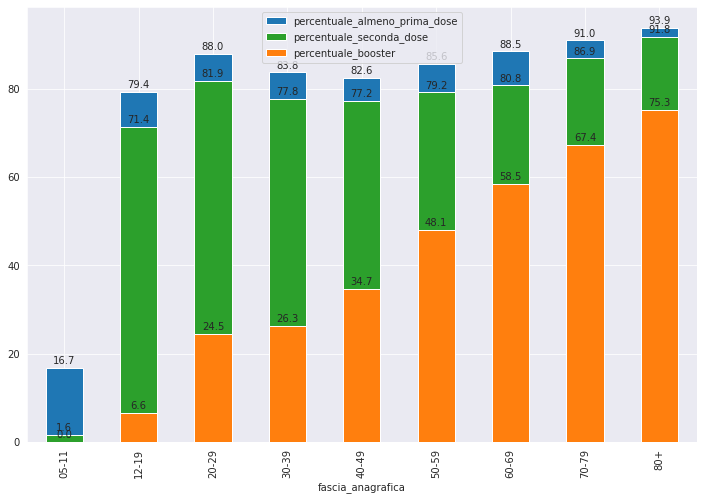

In [73]:
#df_fasce.plot(kind = 'bar', y = 'percentuale_almeno_prima_dose')

fig, ax = plt.subplots(figsize =(12, 8))  #figsize =(5, 5)
df_fasce.plot(kind = 'bar', y = 'percentuale_almeno_prima_dose', ax = ax, color="tab:blue")
df_fasce.plot(kind = 'bar', y = 'percentuale_seconda_dose', ax = ax, color="tab:green")
df_fasce.plot(kind = 'bar', y = 'percentuale_booster', ax = ax, color="tab:orange")
add_value_labels(ax)


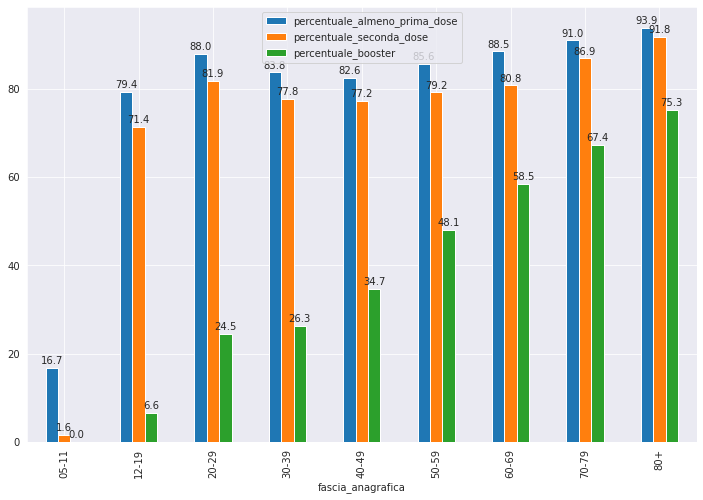

In [74]:
#df_fasce.plot(kind = 'bar', y = 'percentuale_almeno_prima_dose')

fig, ax = plt.subplots(figsize =(12, 8))  #figsize =(5, 5)
df_fasce.plot(kind = 'bar', y = ['percentuale_almeno_prima_dose','percentuale_seconda_dose','percentuale_booster'], ax = ax)#, color="tab:blue")
#df_fasce.plot(kind = 'bar', y = 'percentuale_seconda_dose', ax = ax, color="tab:green")
#df_fasce.plot(kind = 'bar', y = 'percentuale_booster', ax = ax, color="tab:orange")
add_value_labels(ax)


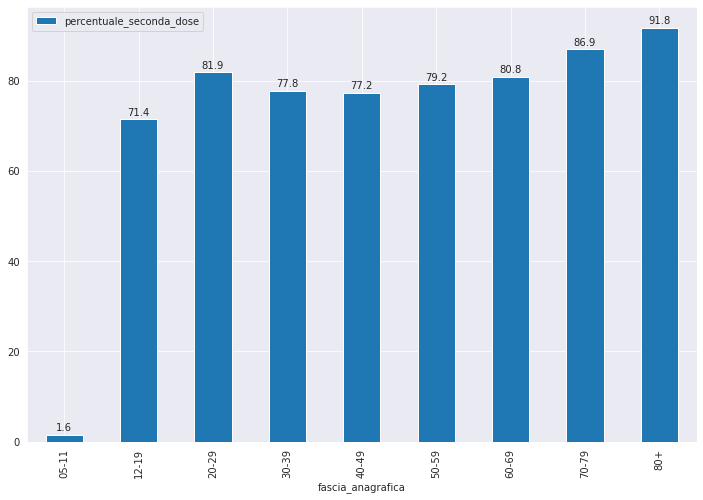

In [75]:
#df_fasce.plot(kind = 'bar', y = 'percentuale_almeno_prima_dose')

fig, ax = plt.subplots(figsize =(12, 8))  #figsize =(5, 5)
df_fasce.plot(kind = 'bar', y = 'percentuale_seconda_dose', ax = ax)
add_value_labels(ax, spacing=2)


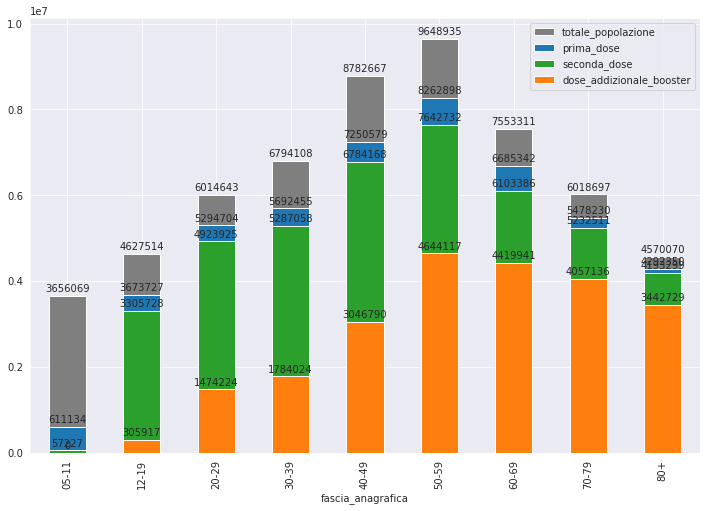

In [76]:
fig, ax = plt.subplots(figsize =(12, 8)) 
df_fasce.plot(kind = 'bar', y = 'totale_popolazione', ax = ax, color = "tab:grey")
df_fasce.plot(kind = 'bar', y = 'prima_dose', ax = ax, color="tab:blue")
df_fasce.plot(kind = 'bar', y = 'seconda_dose', ax = ax, color="tab:green" )
df_fasce.plot(kind = 'bar', y = 'dose_addizionale_booster', ax = ax, color="tab:orange")
add_value_labels(ax, spacing=2, n_decimals = 0 )


## Percentuale vaccinati sul totale

In [77]:
df_fasce_trans = df_fasce.transpose()
df_fasce_trans

fascia_anagrafica,05-11,12-19,20-29,30-39,40-49,50-59,60-69,70-79,80+
totale,669308,7405691,11903708,12975224,17369659,20890616,17441160,14926515,12024894
sesso_maschile,345351,3804038,6155413,6592960,8575859,10231038,8484005,7044751,4739245
sesso_femminile,323957,3601653,5748295,6382264,8793800,10659578,8957155,7881764,7285649
prima_dose,611134,3673727,5294704,5692455,7250579,8262898,6685342,5478230,4292350
seconda_dose,57227,3305728,4923925,5287058,6784168,7642732,6103386,5232511,4193299
pregressa_infezione,947,120319,210855,211687,288122,340869,232491,158638,96516
dose_addizionale_booster,0,305917,1474224,1784024,3046790,4644117,4419941,4057136,3442729
ultimo_aggiornamento,2022-01-10,2022-01-10,2022-01-10,2022-01-10,2022-01-10,2022-01-10,2022-01-10,2022-01-10,2022-01-10
totale_popolazione,3656069,4627514,6014643,6794108,8782667,9648935,7553311,6018697,4570070
percentuale_almeno_prima_dose,16.715604,79.388782,88.030229,83.785171,82.555549,85.635337,88.508761,91.020199,93.923069


In [78]:
col = ''
for ele in df_fasce_trans.columns:
    col += '+'+ele
col
    

'+05-11+12-19+20-29+30-39+40-49+50-59+60-69+70-79+80+'

In [79]:
df_fasce_trans

fascia_anagrafica,05-11,12-19,20-29,30-39,40-49,50-59,60-69,70-79,80+
totale,669308,7405691,11903708,12975224,17369659,20890616,17441160,14926515,12024894
sesso_maschile,345351,3804038,6155413,6592960,8575859,10231038,8484005,7044751,4739245
sesso_femminile,323957,3601653,5748295,6382264,8793800,10659578,8957155,7881764,7285649
prima_dose,611134,3673727,5294704,5692455,7250579,8262898,6685342,5478230,4292350
seconda_dose,57227,3305728,4923925,5287058,6784168,7642732,6103386,5232511,4193299
pregressa_infezione,947,120319,210855,211687,288122,340869,232491,158638,96516
dose_addizionale_booster,0,305917,1474224,1784024,3046790,4644117,4419941,4057136,3442729
ultimo_aggiornamento,2022-01-10,2022-01-10,2022-01-10,2022-01-10,2022-01-10,2022-01-10,2022-01-10,2022-01-10,2022-01-10
totale_popolazione,3656069,4627514,6014643,6794108,8782667,9648935,7553311,6018697,4570070
percentuale_almeno_prima_dose,16.715604,79.388782,88.030229,83.785171,82.555549,85.635337,88.508761,91.020199,93.923069


In [80]:
df_fasce_trans.loc[:, 'tot_all']  = df_fasce_trans.sum(axis=1)
df_fasce_trans.loc[:, 'tot_>12'] = df_fasce_trans.drop(columns = ['05-11', 'tot_all']).sum(axis=1)
df_fasce_trans

fascia_anagrafica,05-11,12-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,tot_all,tot_>12
totale,669308,7405691,11903708,12975224,17369659,20890616,17441160,14926515,12024894,115606775,114937467
sesso_maschile,345351,3804038,6155413,6592960,8575859,10231038,8484005,7044751,4739245,55972660,55627309
sesso_femminile,323957,3601653,5748295,6382264,8793800,10659578,8957155,7881764,7285649,59634115,59310158
prima_dose,611134,3673727,5294704,5692455,7250579,8262898,6685342,5478230,4292350,47241419,46630285
seconda_dose,57227,3305728,4923925,5287058,6784168,7642732,6103386,5232511,4193299,43530034,43472807
pregressa_infezione,947,120319,210855,211687,288122,340869,232491,158638,96516,1660444,1659497
dose_addizionale_booster,0,305917,1474224,1784024,3046790,4644117,4419941,4057136,3442729,23174878,23174878
ultimo_aggiornamento,2022-01-10,2022-01-10,2022-01-10,2022-01-10,2022-01-10,2022-01-10,2022-01-10,2022-01-10,2022-01-10,2022-01-102022-01-102022-01-102022-01-102022-0...,2022-01-102022-01-102022-01-102022-01-102022-0...
totale_popolazione,3656069,4627514,6014643,6794108,8782667,9648935,7553311,6018697,4570070,57666014,54009945
percentuale_almeno_prima_dose,16.715604,79.388782,88.030229,83.785171,82.555549,85.635337,88.508761,91.020199,93.923069,709.562701,692.847098


In [81]:
def percentuale_vacc(colonna): 
    return df_fasce_trans.loc['prima_dose', colonna]/ df_fasce_trans.loc['totale_popolazione', colonna]*100

In [82]:
percentuale_vacc('tot_all')

81.9224630299573

In [83]:
percentuale_vacc('tot_>12')


86.33647932802006

In [84]:
df_f= pd.DataFrame({'a': [1, 2, 3, 4, 5, 6],
                   'b': [1, 1, 2, 3, 5, 8],
                   'c': [1, 4, 9, 16, 25, 36]})

In [85]:
df_f

,a,b,c
0,1,1,1
1,2,1,4
2,3,2,9
3,4,3,16
4,5,5,25
5,6,8,36


In [86]:
df_f.loc[:,'c_diff'] = df_f['c'].diff()

In [87]:
df_f

,a,b,c,c_diff
0,1,1,1,NaN
1,2,1,4,3.0
2,3,2,9,5.0
3,4,3,16,7.0
4,5,5,25,9.0
5,6,8,36,11.0


## Platea booster

In [88]:
df_platea_booster_grouped = df_platea_booster.groupby('categoria_prevalente').sum()
tot_pop_booster = df_platea_booster_grouped['totale_popolazione'].sum()

In [89]:
df_platea_grouped['totale_popolazione']

fascia_anagrafica
05-11    3656069
12-19    4627514
20-29    6014643
30-39    6794108
40-49    8782667
50-59    9648935
60-69    7553311
70-79    6018697
80+      4570070
Name: totale_popolazione, dtype: int64

In [90]:
tot_platea = df_platea_grouped['totale_popolazione'].sum()
tot_platea

57666014

In [91]:
tot_platea12 = df_platea_grouped[df_platea_grouped.index != '05-11']['totale_popolazione'].sum()
tot_platea12

54009945

In [92]:
tot_vaccini_booster = df_somm_grouped['dose_addizionale_booster'].sum()
tot_vaccini_booster

23174878

### Percentuale vaccini booster somministrati

In [93]:
# Percentuale vaccini booster eseguiti su popolazione booster (che ha ricevuto la seconda dose da almeno 5 mesi ?)
tot_vaccini_booster/tot_pop_booster*100

74.75500149075322

In [94]:
tot_vaccini_booster/tot_platea*100

40.18810455669781

In [95]:
tot_vaccini_booster/tot_platea12*100

42.90853841824872

In [96]:
tot_seconda_dose = df_anagrafica['seconda_dose'].sum()
tot_seconda_dose

43530034

In [97]:
tot_vaccini_booster/tot_seconda_dose*100

53.238823567195006